<a href="https://colab.research.google.com/github/EFalkonn/BharatInternML2024/blob/main/BharatInternHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features:
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  
0       2003          2003     VinylSd         0.0        856.0  
1       1976          1976     MetalSd         0.0       1262.0  
2       2001          2002     VinylSd         0.0        920.0  
3       1915          1970     Wd Sdng         0.0        756.0  
4       2000          2000     VinylSd         0.0       1145.0  

Target:
0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64
Transformed Features Shape: (2919, 38)
Epoch 1/100
59/59

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - 0s 5ms/step - loss: 35993075712.0000 - val_loss: 36658696192.0000
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 35918073856.0000 - val_loss: 36535144448.0000
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 35728805888.0000 - val_loss: 36265230336.0000
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - loss: 35368214528.0000 - val_loss: 35795492864.0000
Epoch 6/100
59/59 [==============================] - 0s 5ms/step - loss: 34784776192.0000 - val_loss: 35079200768.0000
Epoch 7/100
59/59 [==============================] - 0s 5ms/step - loss: 33939011584.0000 - val_loss: 34086819840.0000
Epoch 8/100
59/59 [==============================] - 0s 3ms/step - loss: 32804556800.0000 - val_loss: 32789045248.0000
Epoch 9/100
59/59 [==============================] - 0s 3ms/step - loss: 31363145728.0000 - val_loss: 31187953664.0000
Epoch 10/100
59/59 [==============================] - 0s 3ms

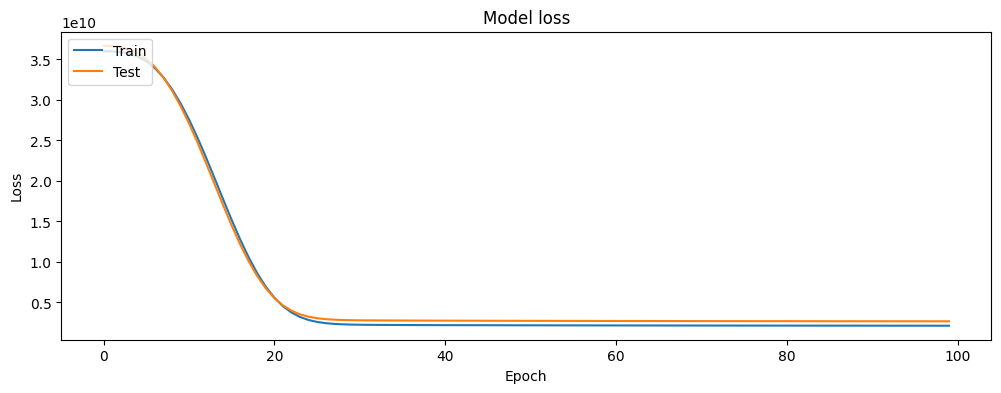

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the dataset
file_path = '/content/HousePricePrediction.csv'
data = pd.read_csv(file_path)

# Handle missing values separately for numerical and categorical columns
numerical_features = data.select_dtypes(include=['number']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Impute missing numerical values with the mean
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# Impute missing categorical values with the mode
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

# Define features and target
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Verify the features and target
print("Features:")
print(X.head())
print("\nTarget:")
print(y.head())

# Update numerical_features to exclude 'SalePrice'
numerical_features = numerical_features.drop('SalePrice', errors='ignore')

# Convert categorical features to numeric using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessor
X = preprocessor.fit_transform(X)

# Verify the transformed features
print("Transformed Features Shape:", X.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1,
                    callbacks=[early_stopping, model_checkpoint])

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()